# Explore here

- DATA FROM: https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv

In [980]:
# Your code here
import os
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

os.makedirs("/workspaces/linear-regression/data/raw", exist_ok = True)
file_path = os.path.join("/workspaces/linear-regression/data/raw", "medical_insurance_cost.csv")

train_data.to_csv(file_path, index=False)

train_data.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


In [981]:
train_data.shape

(1070, 7)

- age: Age of primary beneficiary (numeric)
- sex: Gender of the primary beneficiary (categorical)
- bmi: Body mass index (numeric)
- children: Number of children/dependents covered by health insurance (numeric)
- smoker: Is the person a smoker? (categorical)
- region: Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
- charges: Health insurance premium (numerical) (TARGET)

In [982]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [983]:
duplicates = train_data.duplicated().sum()
print(f'Duplicate rows: {duplicates}')
train_data.value_counts()

Duplicate rows: 0


age  sex     bmi     children  smoker  region     charges    
64   male    39.160  1         no      southeast  14418.28040    1
18   female  20.790  0         no      southeast  1607.51010     1
             21.660  0         yes     northeast  14283.45940    1
             24.090  1         no      southeast  2201.09710     1
             25.080  0         no      northeast  2196.47320     1
                                                                ..
             35.625  0         no      northeast  2211.13075     1
             36.850  0         no      southeast  1629.83350     1
                               yes     southeast  36149.48350    1
             37.290  1         no      southeast  2219.44510     1
             38.170  0         no      southeast  1631.66830     1
Name: count, Length: 1070, dtype: int64

There are no duplicates in the data and we're not missing any value, there are no NaN in the dataframe

In [984]:
train_data.nunique()

age           47
sex            2
bmi          494
children       6
smoker         2
region         4
charges     1070
dtype: int64

CATEGORICAL VARIABLES:

- sex
- smoker
- region

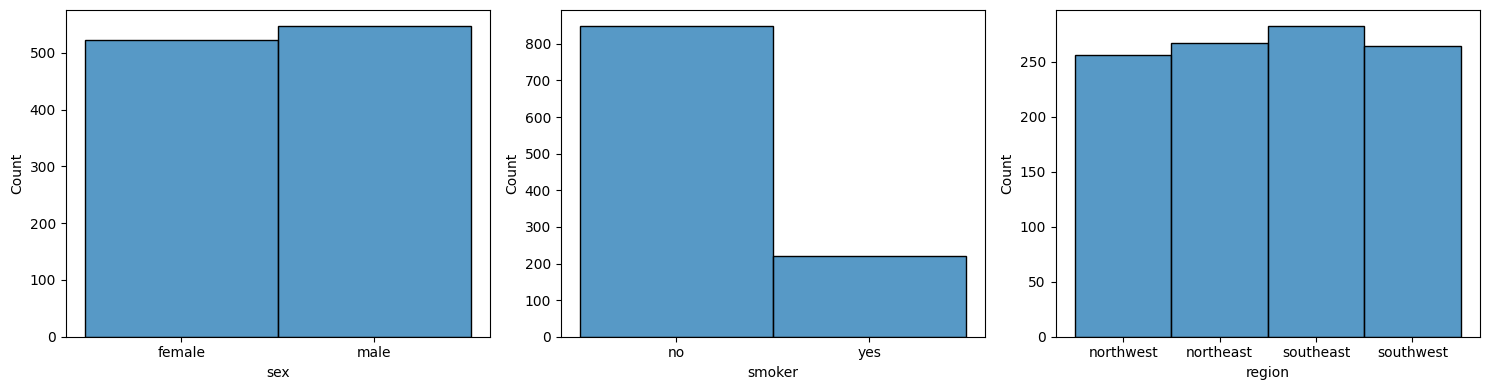

In [985]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 4))

sns.histplot(ax = axis[0], data = train_data, x = "sex").set(xlabel = "sex")
sns.histplot(ax = axis[1], data = train_data, x = "smoker").set(xlabel = "smoker")
sns.histplot(ax = axis[2], data = train_data, x = "region").set(xlabel = "region")

plt.tight_layout()
plt.show()

NUMERICAL VARIABLES:

- age
- bmi
- children
- charges

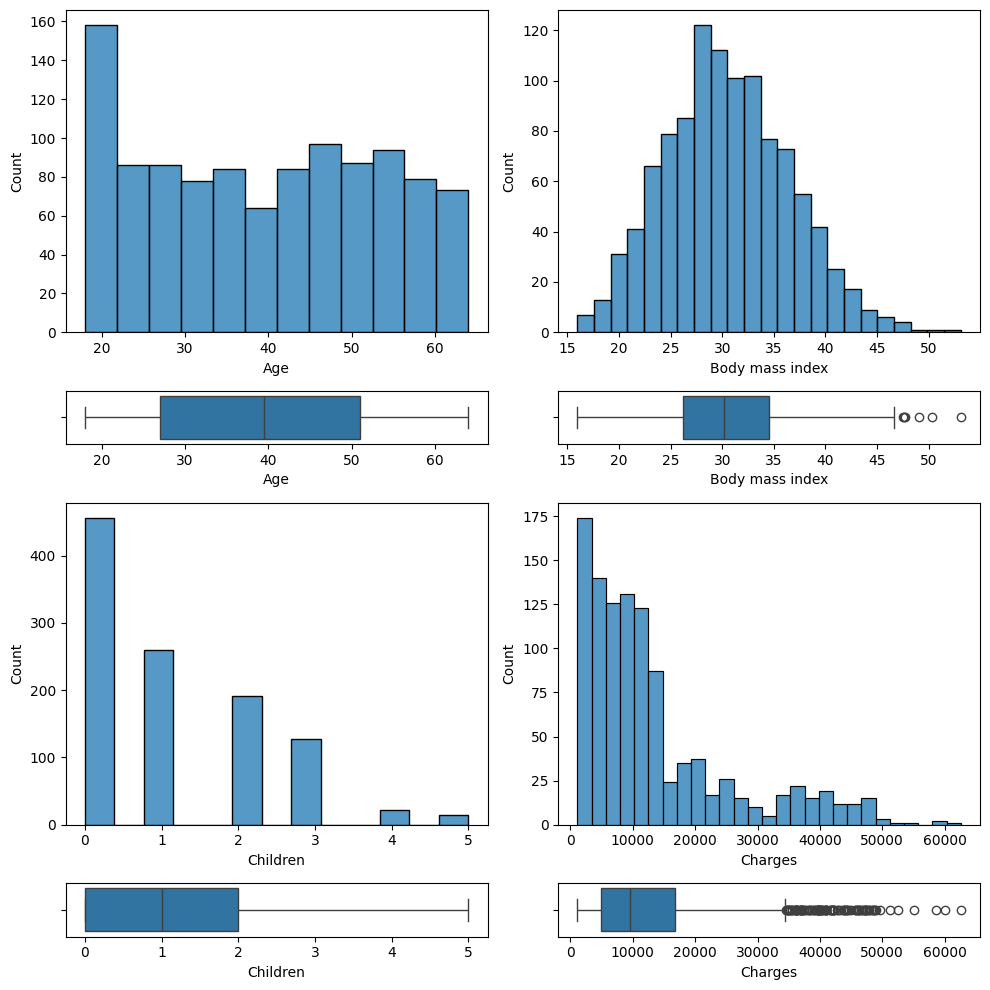

In [986]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={"height_ratios": [6, 1] * 2})

sns.histplot(ax = axis[0,0], data = train_data, x = "age").set(xlabel = "Age")
sns.boxplot(ax = axis[1,0], data = train_data, x = "age").set(xlabel = "Age")

sns.histplot(ax = axis[0,1], data = train_data, x = "bmi").set(xlabel = "Body mass index")
sns.boxplot(ax = axis[1,1], data = train_data, x = "bmi").set(xlabel = "Body mass index")

sns.histplot(ax = axis[2,0], data = train_data, x = "children").set(xlabel = "Children")
sns.boxplot(ax = axis[3,0], data = train_data, x = "children").set(xlabel = "Children")

sns.histplot(ax = axis[2,1], data = train_data, x = "charges").set(xlabel = "Charges")
sns.boxplot(ax = axis[3,1], data = train_data, x = "charges").set(xlabel = "Charges")

plt.tight_layout()
plt.show()

FACTORIZING DATA

In [987]:
heatmap_df = train_data.copy()

heatmap_df["sex_n"] = pd.factorize(heatmap_df["sex"])[0]
heatmap_df["smoker_n"] = pd.factorize(heatmap_df["smoker"])[0]
heatmap_df["region_n"] = pd.factorize(heatmap_df["region"])[0]

heatmap_df[:10]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
560,46,female,19.950,2,no,northwest,9193.83850,0,0,0
1285,47,female,24.320,0,no,northeast,8534.67180,0,0,1
1142,52,female,24.860,0,no,southeast,27117.99378,0,0,2
969,39,female,34.320,5,no,southeast,8596.82780,0,0,2
486,54,female,21.470,3,no,northwest,12475.35130,0,0,0
170,63,male,41.470,0,no,southeast,13405.39030,1,0,2
277,22,female,24.300,0,no,southwest,2150.46900,0,0,3
1033,18,male,21.565,0,yes,northeast,13747.87235,1,1,1
209,40,male,41.230,1,no,northeast,6610.10970,1,0,1
947,37,male,34.200,1,yes,northeast,39047.28500,1,1,1


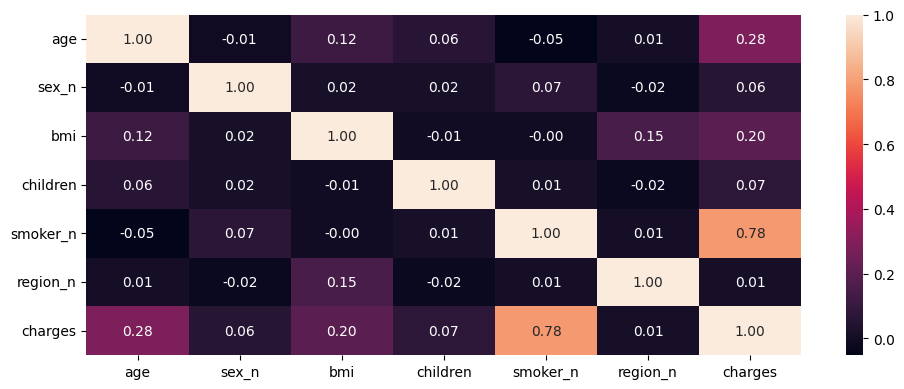

In [988]:
fig, axes = plt.subplots(figsize = (10, 4))

sns.heatmap(heatmap_df[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

- 'smoker' variable has the highest correlation with 'charges' -> This suggests that whether a person smokes has a major impact on insurance charges
- moderate correlation between 'age' and 'charges' -> Older individuals tend to have higher insurance charges
- moderate correlation between 'bmi' and 'charges' -> Higher BMI is associated with slightly higher charges

In [989]:
heatmap_df.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736,0.512150,0.205607,1.518692
std,14.073960,6.043386,1.215983,12019.510778,0.500086,0.404334,1.105783
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.205000,0.000000,4897.667387,0.000000,0.000000,1.000000
50%,39.500000,30.210000,1.000000,9575.442100,1.000000,0.000000,2.000000
75%,51.000000,34.496250,2.000000,16746.657400,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,62592.873090,1.000000,1.000000,3.000000


Processing bmi ouliers

In [990]:

bmi_stats = heatmap_df["bmi"].describe()
bmi_stats

count    1070.000000
mean       30.560397
std         6.043386
min        15.960000
25%        26.205000
50%        30.210000
75%        34.496250
max        53.130000
Name: bmi, dtype: float64

In [991]:

#
#       BMI
#
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]

bmi_upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
bmi_lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f'Price upper limit: {round(bmi_upper_limit, 2)}')
print(f'Price lower limit: {round(bmi_lower_limit, 2)} \n')

Price upper limit: 46.93
Price lower limit: 13.77 



In [992]:
#
#       BMI
#
heatmap_df['bmi'] = heatmap_df['bmi'].apply(
    lambda x: min(x, bmi_upper_limit) if x > bmi_upper_limit else x
)

In [993]:
heatmap_df["bmi"].describe()

count    1070.000000
mean       30.547471
std         6.003836
min        15.960000
25%        26.205000
50%        30.210000
75%        34.496250
max        46.933125
Name: bmi, dtype: float64

In [994]:
heatmap_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
 7   sex_n     1070 non-null   int64  
 8   smoker_n  1070 non-null   int64  
 9   region_n  1070 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 92.0+ KB


SCALING

In [995]:
from sklearn.model_selection import train_test_split

scaled_df = heatmap_df.copy()

num_variables = ["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]

X = scaled_df[num_variables].drop("charges", axis = 1)
y = scaled_df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train)

,age,sex_n,bmi,children,smoker_n,region_n
94,64,0,31.300,2,1,3
814,36,1,34.430,2,0,2
246,60,0,38.060,0,0,2
794,39,0,31.920,2,0,0
1239,25,0,42.130,1,0,2
...,...,...,...,...,...,...
953,44,1,30.200,2,1,3
450,39,1,29.600,4,0,3
83,48,0,41.230,4,0,0
747,19,1,21.755,0,0,0


- SCALING

In [996]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selection_model = SelectKBest(f_regression, k=5)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_selected = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_selected = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

#scaler = StandardScaler()
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected), index=X_train.index, columns=X_train_selected.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected), index=X_test.index, columns=X_test_selected.columns)

y_train = pd.Series(y_train, index=X_train.index)
y_test = pd.Series(y_test, index=X_test.index)

print(selected_columns)

print(f'X_train_scaled: {X_train_scaled} \n')
print(f'X_test_scaled: {X_test_scaled}')

Index(['age', 'sex_n', 'bmi', 'children', 'smoker_n'], dtype='object')
X_train_scaled:            age  sex_n       bmi  children  smoker_n
94    1.000000    0.0  0.480940       0.4       1.0
814   0.391304    1.0  0.584864       0.4       0.0
246   0.913043    0.0  0.705389       0.0       0.0
794   0.456522    0.0  0.501525       0.4       0.0
1239  0.152174    0.0  0.840524       0.2       0.0
...        ...    ...       ...       ...       ...
953   0.565217    1.0  0.444417       0.4       1.0
450   0.456522    1.0  0.424495       0.8       0.0
83    0.652174    0.0  0.810641       0.8       0.0
747   0.021739    1.0  0.164021       0.0       0.0
880   0.086957    1.0  0.597149       0.6       0.0

[856 rows x 5 columns] 

X_test_scaled:            age  sex_n       bmi  children  smoker_n
1049  0.673913    1.0  0.467659       0.0       1.0
257   0.434783    0.0  0.774783       0.0       0.0
1022  0.630435    1.0  0.639648       0.2       1.0
1071  0.978261    1.0  0.485754       0.

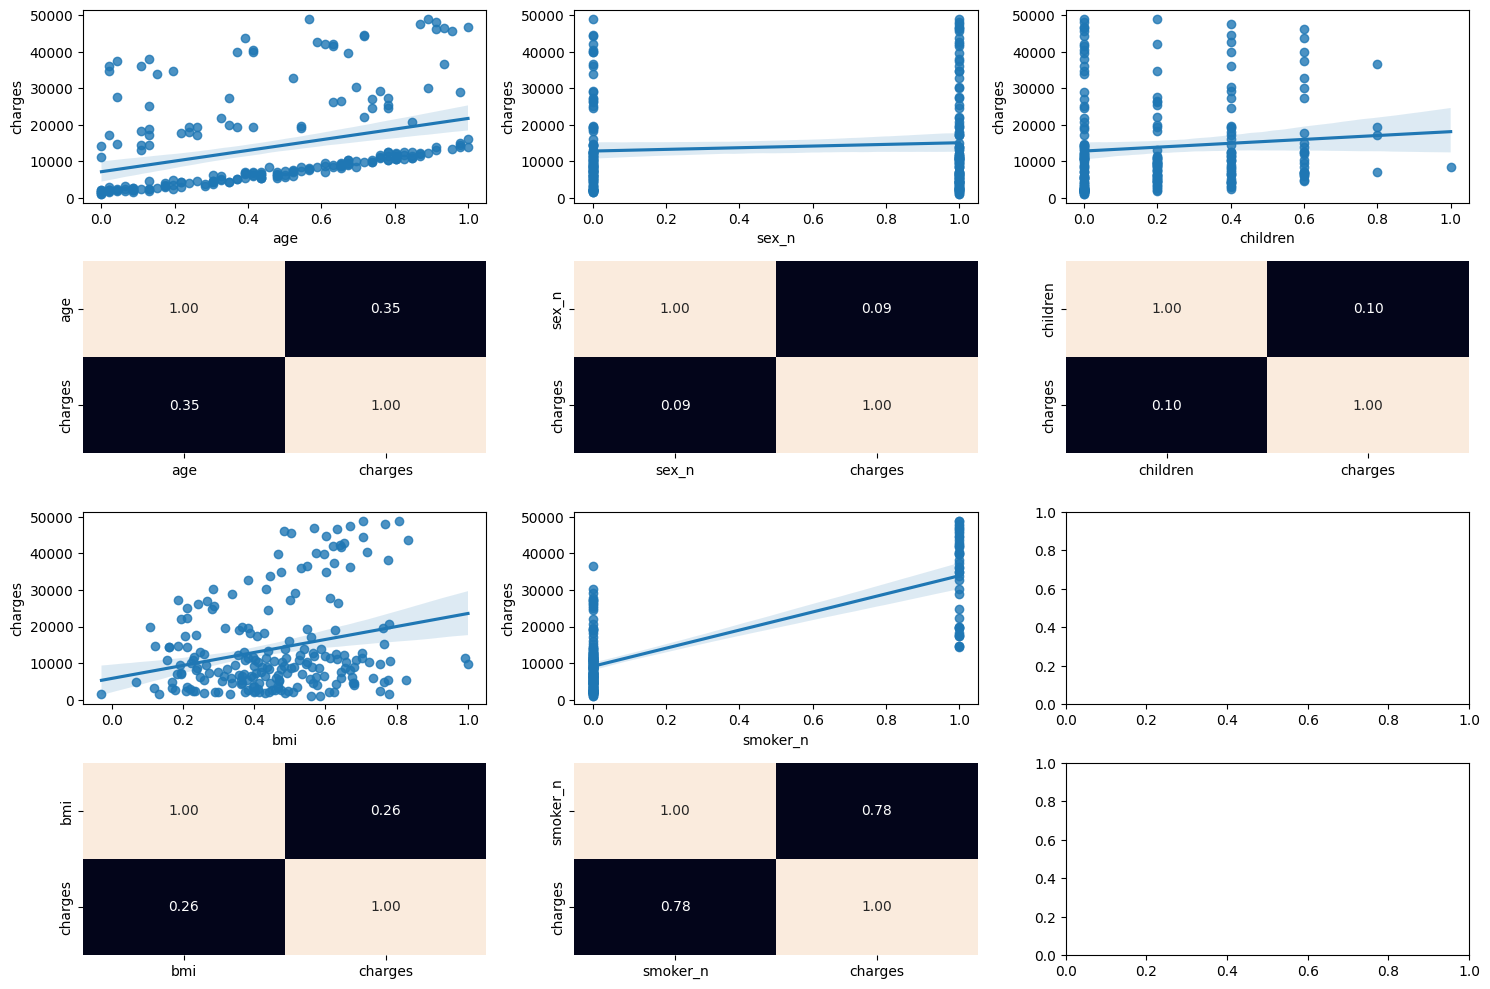

In [997]:
y_test_df = pd.DataFrame(y_test, index=X_test_scaled.index, columns=["charges"])

fig, axis = plt.subplots(4, 3, figsize = (15, 10))
total_data = pd.concat([X_test_scaled, y_test_df], axis=1)

sns.regplot(ax = axis[0,0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = total_data, x = "sex_n", y = "charges")
sns.heatmap(total_data[["sex_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

sns.regplot(ax = axis[0,2], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2], cbar = False)

sns.regplot(ax = axis[2,0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0], cbar = False)

sns.regplot(ax = axis[2,1], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["smoker_n", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3,1], cbar = False)

plt.tight_layout()

plt.show()

- LINEAR REGRESSION


In [998]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [999]:
#model.coef_
model_coefficients = pd.DataFrame(model.coef_, X_test_scaled.columns, columns=["Coefficient"])
print(model_coefficients)

           Coefficient
age       11630.066138
sex_n      -184.385809
bmi       10284.930820
children   1803.735843
smoker_n  23549.866521


In [1000]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

print(f'{y_pred} \n')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse} \n')
print(f'R²: {r2}')

[33923.49842207 10935.66436457 35547.49022026 14099.32734848
  1390.92953232  7739.51183463  5225.71048212  3417.25189005
  9950.39572381  9024.80865113 11605.56659523 35224.30655832
  8091.00214226  7994.63737988  8633.77629051 33631.68725403
 14582.80261607 12114.44635513 28406.37298025  9937.54984207
 16967.9561738   4020.7408529  14046.44507999   485.71850609
 29605.57828184 11268.50116814 11934.60757257 13735.10273237
 17939.1351784   8259.62480608  5385.76140251 38651.20138464
 12855.77518921  6192.16278672  9830.20633063  7652.28836572
  2147.83224503 30761.55973033 11337.26147084  5640.74405852
  3023.58606172  2730.52872955  6021.19726628  5814.21526766
 27333.27585063 10140.83054364 13998.25426877  7053.60157068
 32163.87003559 15353.39696445 13990.46810016  7868.84581249
  1324.30838792 11233.23568195  2994.19143542  3506.56550286
 34930.48380258  8612.61621065 10089.03317294  3830.72246497
 36721.46850159  9460.953293   -2565.82854879 32745.00438136
 15726.68585925 15073.63

- MINMAX SCALER RESULTS:

    - MSE: 43734971.196322665 
    - R²: 0.7258750505814542

- STANDARD SCALER:

    - MSE: 43734971.19632266 
    - R²: 0.7258750505814542

Same result for both scaling methods.

- Handling the bmi outliers insignificantly improves the results

    - MSE: 43723047.49696347 
    - R²: 0.7259497867341098

- Applying the STANDARD SCALER BEFORE train_test_split greatly improves the results for MSE 

    - MSE: 0.3029304392930363 
    - R²: 0.7259497867341098
    >(PROBABLY DATA LEAKAGE FOR APPLYING SCALING TO THE ENTIRE DATASET, INFLATED PERFORMANCE)

- Applying the MINMAX SCALER BEFORE train_test_split greatly improves the results for MSE 

    - MSE: 0.011570972986632544 
    - R²: 0.7259497867341098
    >(PROBABLY DATA LEAKAGE FOR APPLYING SCALING TO THE ENTIRE DATASET, INFLATED PERFORMANCE)

- With test_size = 0.1 the results slightly improve

    - MSE: 40708594.27967352 
    - R²: 0.7542917963640243

Either way, I'll leave it with a test_size = 0.2